# PROJETO FINAL : Análise de dados com Python


### Escola Britânica de Artes Criativas - EBAC

Professor: [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **ETAPAS**

<ol type="1">
  <li>Acesso ao banco de dados;</li>
  <li>exploração dos Dados;</li>
  <li>Tratamento e modelagem;</li>
  <li>Validação e Visualização</li>
</ol>


---

> Importando as bibliotecas necessárias para análise e visualização da Data Base.

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

> Importando a fonte da Data Base, que neste caso foi fornecido pelo professor orientador.

In [231]:
URL ='https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'

### *Legenda*

| COLUNA  | DESCRIÇÃO |
| ------- | --------- |
| id      | Número da conta |
| default | Adimplente (0); Inadimplente (1) |
| idade   | Idade |
| sexo    | Gênero |
| depedentes | Quantidade de pessoas dependentes diretamente |
| escolaridade | Formação |
| estado_civil | Estado civíl |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


### TRATAMENTO DOS DADOS

In [232]:
df = pd.read_csv(URL, na_values = 'na')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [233]:
df.isna().sum() 

id                            0
default                       0
idade                         0
sexo                          0
dependentes                   0
escolaridade               1519
estado_civil                749
salario_anual              1112
tipo_cartao                   0
meses_de_relacionamento       0
qtd_produtos                  0
iteracoes_12m                 0
meses_inativo_12m             0
limite_credito                0
valor_transacoes_12m          0
qtd_transacoes_12m            0
dtype: int64

In [234]:
df.dropna(inplace = True)
df.isna().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

In [235]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [236]:
function_int = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['limite_credito'] = df['limite_credito'].apply(function_int)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(function_int)

In [237]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

### ENTENDENDO A BASE DE DADOS

In [238]:
total,_ = df.shape
adimp,_ = df[df['default'] == 0].shape
inadimp,_ = df[df['default'] == 1].shape

In [239]:
print(f'O total de inadimplentes é de: {round(100 * inadimp/total,2)}% ou {inadimp} de {total}.\nO total de adimplentes é de: {round(100 * adimp/total,2)}% ou {adimp} de {total}.')

O total de inadimplentes é de: 15.72% ou 1113 de 7081.
O total de adimplentes é de: 84.28% ou 5968 de 7081.


### VISUALIZAÇÃO DOS DADOS

---

TypeError: 'int' object is not subscriptable

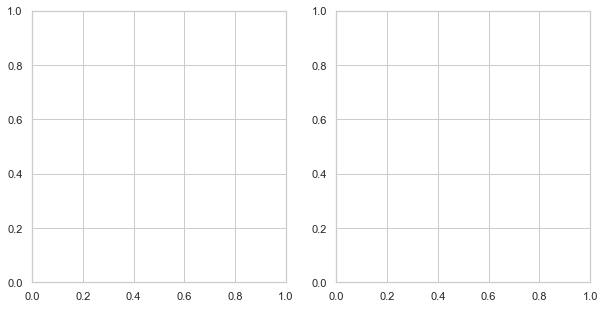

In [257]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,2, figsize=(10, 5), sharex=True)


for dataframe in [adimp, inadimp]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'default'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['default'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='default')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

TypeError: 'int' object is not subscriptable

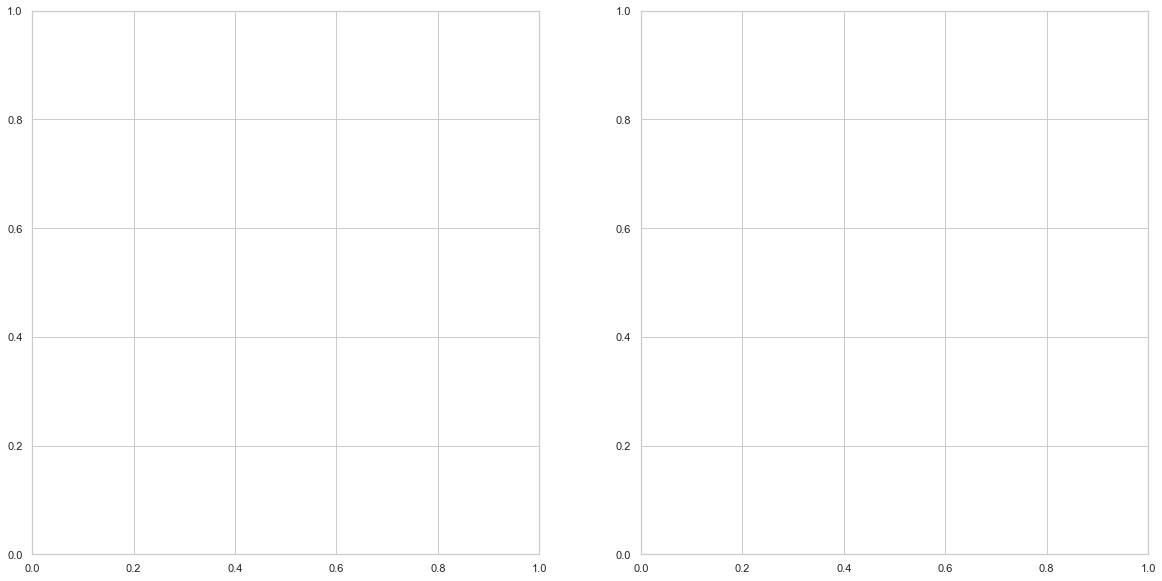

In [229]:
coluna = 'idade'
titulos = ['Idade dos Clientes Adimplentes', 'Idade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('int').describe()[coluna]['max']

figura, eixos = plt.subplots(1,2, figsize=(20, 10), sharex=True)


for dataframe in [adimp, inadimp]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'Default'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['Default'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Default')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

C:\Users\alexy\AppData\Local\Temp/ipykernel_11656/3134822399.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


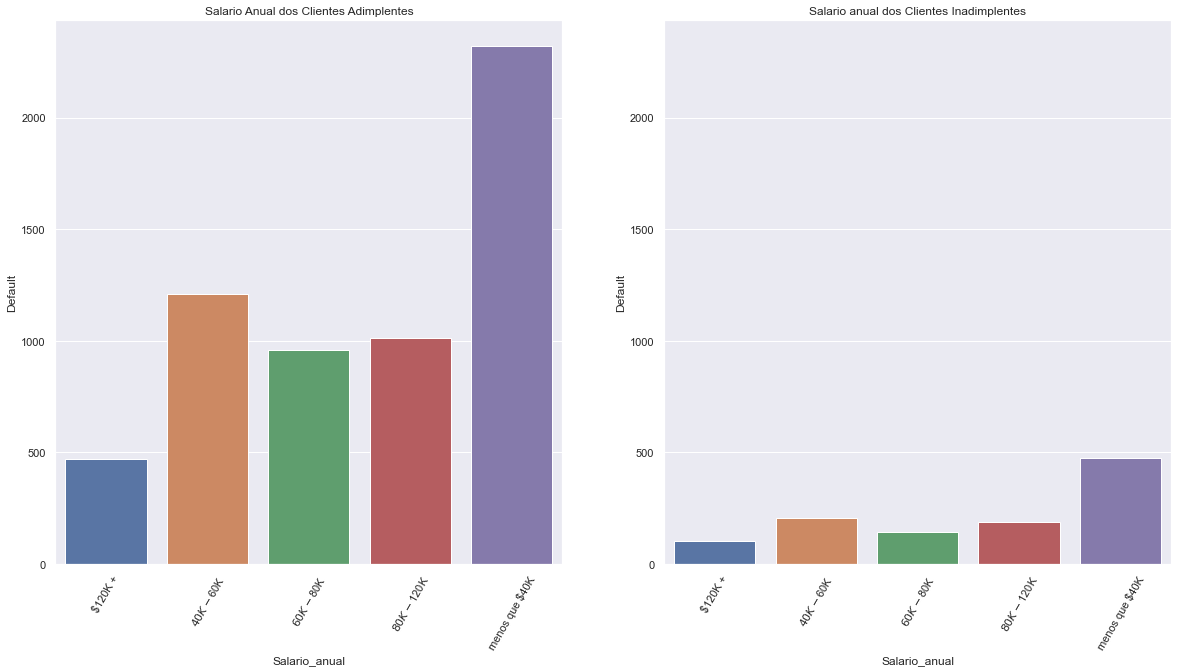

In [191]:
coluna = 'salario_anual'
titulos = ['Salario Anual dos Clientes Adimplentes', 'Salario anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq']

figura, eixos = plt.subplots(1,2, figsize=(20, 10), sharex=True)


for dataframe in [adimp, inadimp]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'Default'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['Default'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Default')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=60)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

C:\Users\alexy\AppData\Local\Temp/ipykernel_11656/1316143309.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


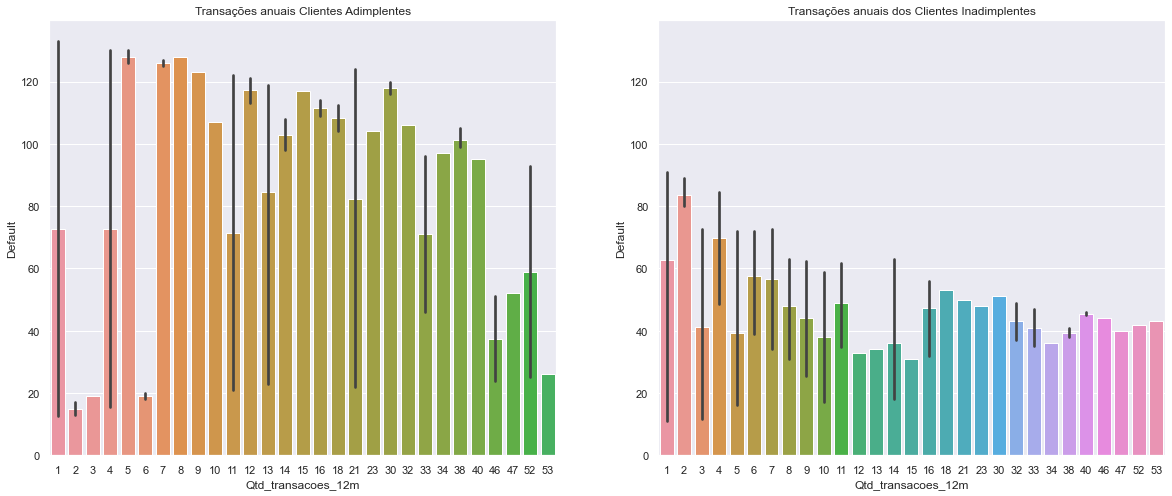

In [201]:
coluna = 'qtd_transacoes_12m'
titulos = ['Transações anuais Clientes Adimplentes', 'Transações anuais dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('int').describe()[coluna]['max']

figura, eixos = plt.subplots(1,2, figsize=(20, 8), sharex=True)


for dataframe in [adimp, inadimp]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'Default'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot['Default'], y=df_to_plot[coluna], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Default')
    f.set_xticklabels(labels=f.get_xticklabels())

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

In [206]:
coluna = ['escolaridade',
          'idade',
          'salario_anual',
          'qtd_transacoes_12m'
         ]
titulos = ['Escolaridade dos Clientes Adimplentes',
           'Idade dos Clientes Adimplentes',
           'Salario Anual dos Clientes Adimplentes',
           'Transações anuais Clientes Adimplentes',
           'Escolaridade dos Clientes Inadimplentes', 
           'Idade dos Clientes Inadimplentes', 
           'Salario anual dos Clientes Inadimplentes',
           'Transações anuais dos Clientes Inadimplentes'
          ]

eixo = 0
max_y = 0
max_esc, max_sal, max_trans_12m = df.select_dtypes('int').describe()[coluna]['max']
max_sal = df.select_dtypes('object').describe()[coluna]['freq']


figura, eixos = plt.subplots(2,4, figsize=(25, 20), sharex=True)


for dataframe in [adimp, inadimp]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'Default'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot['Default'],
                    y=df_to_plot[coluna], 
                    ax=eixos[eixo]
                   )
    f.set(title=titulos[eixo],
          xlabel=coluna.capitalize(),
          ylabel='Default'
         )
    f.set_xticklabels(labels=f.get_xticklabels())

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0,max_y))

    eixo += 1

figura.show()

KeyError: "['escolaridade', 'salario_anual'] not in index"

### ANÁLISE

> Compreende-se que:

#### Ao aprensentar a analise dos dados, percebe-se que, na conjuntura hipotética, o número de clientes inadimplentes, ou seja, os quais NÃO têm credito com a instituição financeira, seria de, aproximadamente 1/5 dos adimplentes. 
*Mesmo após a limpeza dos dados.*

<ol type="1">   
   Os gráficos mostram uma base para afirmarmos as seguintes condições:
    
  <li>O padrão de inadimplencia por idade afirma que nas fases onde o cliente ainda está construindo seu patrimônio seria o momento em que o mesmo se endivida mais, assim como quando ele está proximo, ou usufruindo, da aposentadoria.
    Opostamente, a fase adulta ativa, dos 35 anos até 56 anos, é quando a estabilidade financeira, dos clientes desta instituição financeira, estão no auge e assim contemplando o momento.</li>
  <li>Em relação a escolaridade, segue-se um padrão variado, onde os que têm apenas o bacharel/tecnologo, encontram-se mais endividados em relação ao cliente com especializações e até mesmo aos clientes sem formação superior. 
      Destaca-se os clientes com ensino médio, que se mantem com baixa inadimplencia.
      O insight (1) pode ser levado em consideração, pois a maior parte dos estudantes brasileiros do ensino superior encontram-se endividados e encontram-se na faixa etária do gráfico supracitado (1);</li>
  <li>Em relação a renda anual, pode-se afirmar que quanto menor a renda, maior a probabilidade de inadimplencia, somando aos insight anteriores, inclusive ao gráfico do volume de transações ao longo de 12 meses, comprova-se a desigualdade economica e social </li>
</ol>